<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/Copy_of_dimensionality_reduction_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load the libraries
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
#load the dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
data['species'] = iris.target #label
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
features = iris.data  # Features
features_target = iris.target # Target (species)
feature_names = iris.feature_names
target_names = iris.target_names

#dimensionality of the data
print(f"Original number of features: {features.shape[1]}")
print(f"Original data shape: {features.shape}")


Original number of features: 4
Original data shape: (150, 4)


In [ ]:
#find the dataset dimensions
print(f"Number of dimensions: {data.shape[1]}")

Number of dimensions: 5


In [ ]:
#describe the dataset
print(data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
species_col = data['species']

In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number']).drop(columns=['species'])

# Identify low variance columns (e.g., threshold = 0)
low_variance_cols = numeric_data.columns[numeric_data.var() == 0]



In [ ]:
# Print and drop them
print("Low variance columns:", low_variance_cols.tolist())

Low variance columns: []


In [ ]:
#remove low variance features
data = data.drop(low_variance_cols, axis=1)
print("Features after removing low variance features:", data.columns.tolist())

Features after removing low variance features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']


In [ ]:
#encode the targets
data['species'] = data['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa  


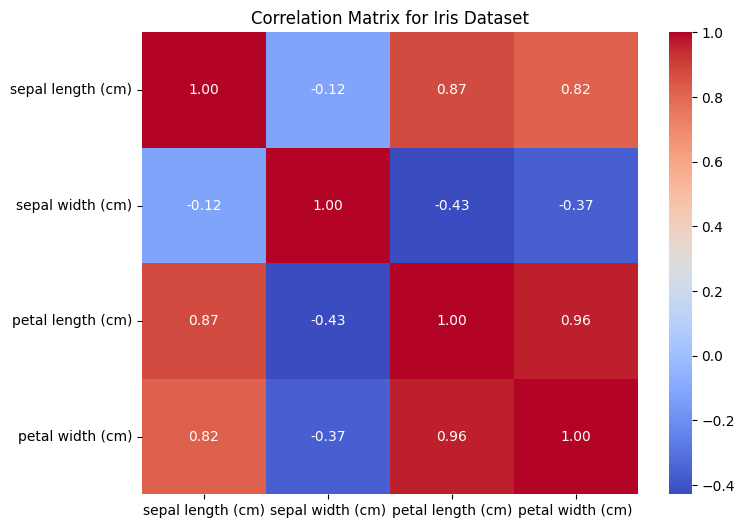

In [ ]:
#visualize redundant features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Iris Dataset')
plt.show()

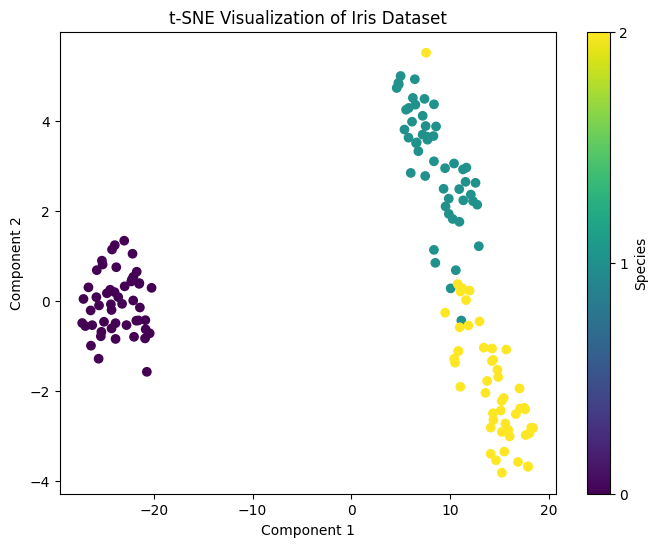

In [ ]:
#tNSE visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data.iloc[:, :-1])  # Exclude target
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=iris.target, cmap='viridis')
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.title('t-SNE Visualization of Iris Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [ ]:
#drop missing values from the dataset
print("Missing values in each column:\n", data.isnull().sum())
data = data.dropna()  # Dropping missing values for this analysis

Missing values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [ ]:
#can also remove correlated features
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
high_correlation = correlation_matrix[correlation_matrix > 0.8]

In [ ]:
numeric_data = numeric_data.loc[:, ~numeric_data.columns.isin(high_correlation.columns)]
print("Remaining features:", data.columns.tolist())

Remaining features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']


In [ ]:
print(data)

In [ ]:
#select features for model performance
from sklearn.ensemble import RandomForestClassifier

X = data.iloc[:, :-1]  # Features
y = data['species']     # Target

model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)
print(feature_importances)

                   Importance
petal length (cm)    0.436130
petal width (cm)     0.436065
sepal length (cm)    0.106128
sepal width (cm)     0.021678


In [ ]:
#build the classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(random_state=42)

In [ ]:
#train the model
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#test the model
predictions = classifier.predict(X_test)
print(f'Accuracy of the model: {accuracy_score(y_test, predictions)}')

Accuracy of the model: 1.0


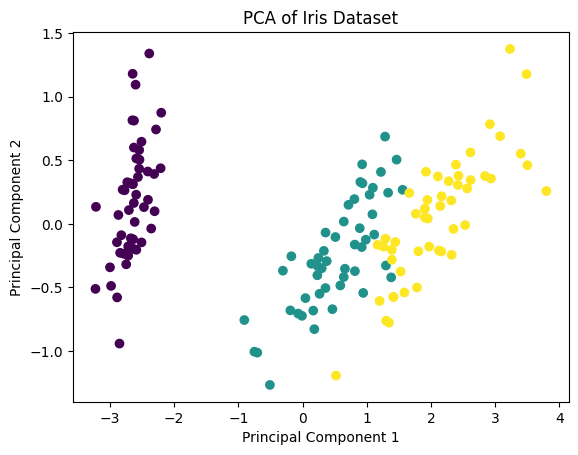

In [ ]:
#IMPROVE THE PROCESS USING PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=iris.target, cmap='viridis')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#check the new datashape after using PCA
print("\nData after standardization (first 5 rows):")
print(principal_components[:5])


Data after standardization (first 5 rows):
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


In [ ]:
#check the contribution of each feature in the original dataset
print("\nContribution of original features to Principal Components:")
for i, pc in enumerate(pca.components_):
    print(f"Principal Component {i+1}:")
    for j, feature_contribution in enumerate(pc):
        print(f"  {feature_names[j]}: {feature_contribution:.3f}")
    print("-" * 30)


Contribution of original features to Principal Components:
Principal Component 1:
  sepal length (cm): 0.361
  sepal width (cm): -0.085
  petal length (cm): 0.857
  petal width (cm): 0.358
------------------------------
Principal Component 2:
  sepal length (cm): 0.657
  sepal width (cm): 0.730
  petal length (cm): -0.173
  petal width (cm): -0.075
------------------------------


The petals seems to influence the pc1 while sepals influence pc2

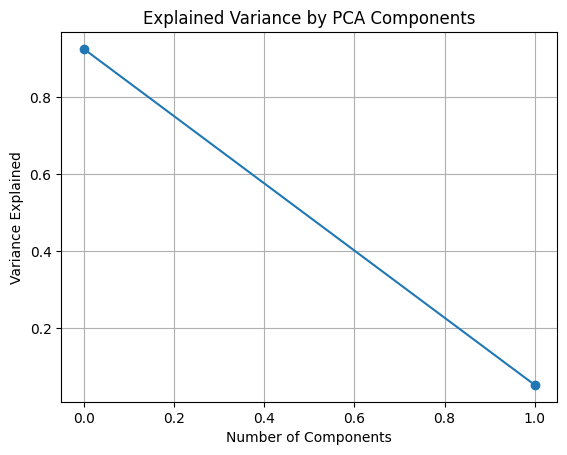

In [ ]:
#CHOOSING OUR COMPONENTS
explained_variance = pca.explained_variance_ratio_
plt.plot(range(len(explained_variance)), explained_variance, marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

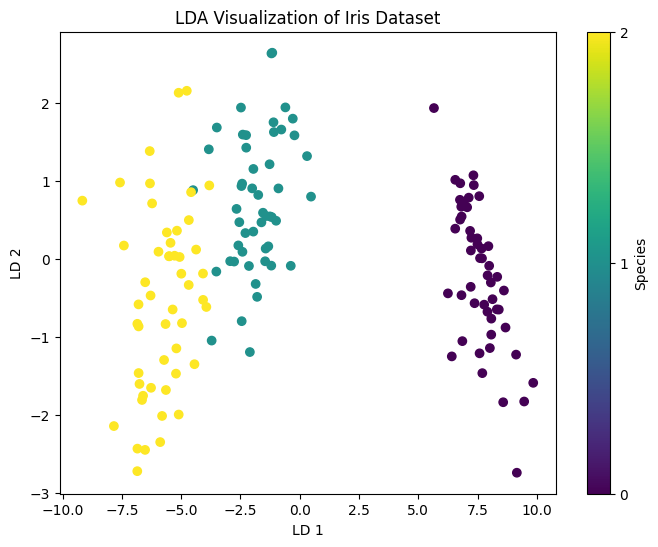

In [ ]:
#using LDA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = iris.data
y = iris.target

# Step 1: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Applying LDA
lda = LDA(n_components=2)
lda_result = lda.fit_transform(scaled_data, iris.target)
lda_components = lda.scalings_

# Visualize LDA result
plt.figure(figsize=(8, 6))
plt.scatter(lda_result[:, 0], lda_result[:, 1], c=iris.target, cmap='viridis')
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.title('LDA Visualization of Iris Dataset')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.show()

In [ ]:
print("Contribution of original features to Linear Discriminants:")
for i, feature in enumerate(feature_names):
    print(f"  {feature}: {lda_components[i, 0]:.3f} (LD1), {lda_components[i, 1]:.3f} (LD2)")

Contribution of original features to Linear Discriminants:
  sepal length (cm): 0.684 (LD1), -0.020 (LD2)
  sepal width (cm): 0.667 (LD1), -0.940 (LD2)
  petal length (cm): -3.873 (LD1), 1.640 (LD2)
  petal width (cm): -2.135 (LD1), -2.157 (LD2)


In [ ]:
#using autoencoders
from keras.models import Model
from keras.layers import Input, Dense

# Define the autoencoder
input_dim = scaled_data.shape[1]
encoding_dim = 2  # Dimension of encoding

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the autoencoder
autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=5, shuffle=True, verbose=0)

In [ ]:
# Encode the data
encoder_model = Model(inputs=input_layer, outputs=encoder)
autoencoder_result = encoder_model.predict(scaled_data)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


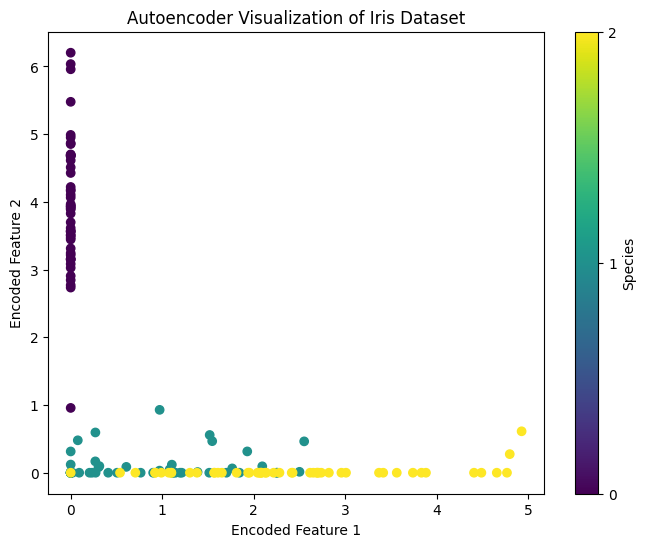

In [ ]:
# Visualize Autoencoder representation
plt.figure(figsize=(8, 6))
plt.scatter(autoencoder_result[:, 0], autoencoder_result[:, 1], c=iris.target, cmap='viridis')
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.title('Autoencoder Visualization of Iris Dataset')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.show()